C:\Users\DELL\Desktop\Productivity_FNN\Plastering_Productivity_FNN\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Classes: ['Bruteforce' 'DoS' 'Information Gathering' 'Mirai' 'non']
Input dim: 77


C:\Users\DELL\Desktop\Productivity_FNN\Plastering_Productivity_FNN\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,157 (254.52 KB)

 Trainable params: 64,261 (251.02 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9777 - loss: 0.1522 - val_accuracy: 0.9902 - val_loss: 0.0653 - learning_rate: 0.0010
Epoch 2/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9867 - loss: 0.0686 - val_accuracy: 0.9883 - val_loss: 0.0618 - learning_rate: 0.0010
Epoch 3/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9870 - loss: 0.0643 - val_accuracy: 0.9894 - val_loss: 0.0573 - learning_rate: 0.0010
Epoch 4/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9881 - loss: 0.0598 - val_accuracy: 0.9912 - val_loss: 0.0462 - learning_rate: 0.0010
Epoch 5/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9886 - loss: 0.0548 - val_accuracy: 0.9920 - val_loss: 0.0479 - learning_rate: 0.0010
Epoch 6/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9888 - loss: 0.0526 - val_accuracy: 0.9927 - val_loss: 0.0427 - learning_rate: 0.0010
Epoch 7/40
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9

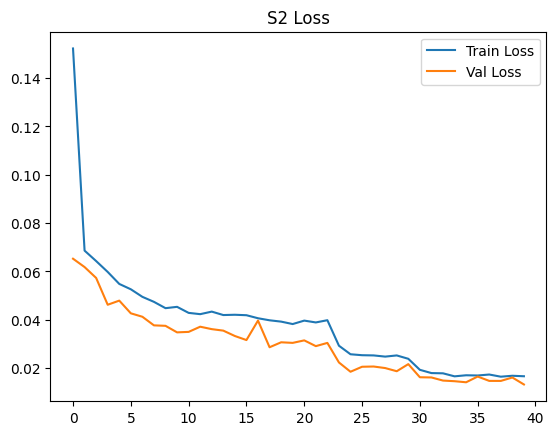

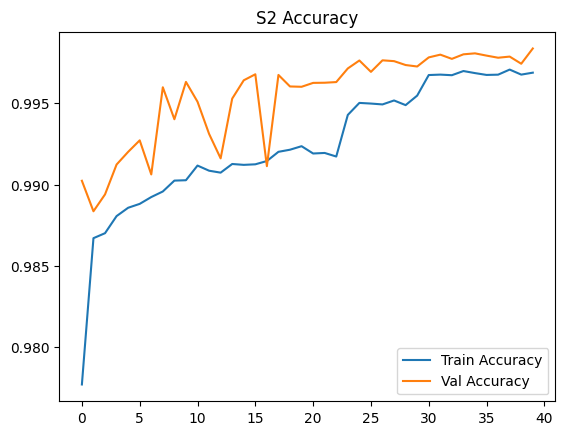

In [1]:
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# ===============================
# Paths
# ===============================
BASE_DIR = "../data/processed/stage2_sample"
SPLITS_DIR = f"{BASE_DIR}/splits"
ARTIFACTS_DIR = "artifacts"
PLOTS_DIR = "plots"

os.makedirs(ARTIFACTS_DIR, exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)

# ===============================
# Load data
# ===============================
data = np.load(f"{SPLITS_DIR}/mlp_data.npz")

X_train = data["X_train"].astype("float32")
y_train = data["y_train"]
X_val   = data["X_val"].astype("float32")
y_val   = data["y_val"]
X_test  = data["X_test"].astype("float32")
y_test  = data["y_test"]

label_encoder = joblib.load(f"{SPLITS_DIR}/label_encoder.pkl")
n_classes = len(label_encoder.classes_)
input_dim = X_train.shape[1]

print(f"Classes: {label_encoder.classes_}")
print(f"Input dim: {input_dim}")

# ===============================
# Feature scaling
# ===============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# ===============================
# Model (Enhanced but SAFE)
# ===============================
model = keras.Sequential([
    layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(1e-3),
                 input_shape=(input_dim,)),
    layers.BatchNormalization(),
    layers.Dropout(0.35),

    layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(1e-3)),
    layers.BatchNormalization(),
    layers.Dropout(0.30),

    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Dense(32, activation="relu"),

    layers.Dense(n_classes, activation="softmax")
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ===============================
# Callbacks
# ===============================
cb = [
    callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    ),
    callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        min_lr=1e-6
    ),
    callbacks.ModelCheckpoint(
        filepath=f"{ARTIFACTS_DIR}/model.keras",
        monitor="val_accuracy",
        save_best_only=True
    )
]

# ===============================
# Training
# ===============================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=64,
    callbacks=cb,
    verbose=1
)

# ===============================
# Save artifacts
# ===============================
model.save(f"{ARTIFACTS_DIR}/model.keras")
joblib.dump(scaler, f"{ARTIFACTS_DIR}/scaler.pkl")
joblib.dump(label_encoder, f"{ARTIFACTS_DIR}/label_encoder.pkl")
np.save(f"{ARTIFACTS_DIR}/training_history.npy", history.history)

# ===============================
# Plotting (TRAIN vs VAL)
# ===============================
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("S2 Loss")
plt.savefig(f"{PLOTS_DIR}/loss.png")

plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("S2 Accuracy")
plt.savefig(f"{PLOTS_DIR}/accuracy.png")

print("✓ S2 training complete")


# RELOAD

In [2]:
import numpy as np
import joblib
from tensorflow import keras
from sklearn.metrics import classification_report

# Paths
ARTIFACTS_DIR = "artifacts"
SPLITS_DIR = "../data/processed/stage2_sample/splits"

# Load artifacts
model = keras.models.load_model(f"{ARTIFACTS_DIR}/model.keras")
scaler = joblib.load(f"{ARTIFACTS_DIR}/scaler.pkl")
label_encoder = joblib.load(f"{ARTIFACTS_DIR}/label_encoder.pkl")

# Load test data
data = np.load(f"{SPLITS_DIR}/mlp_data.npz")
X_test = scaler.transform(data["X_test"].astype("float32"))
y_test = data["y_test"]

# Predict
y_probs = model.predict(X_test, verbose=0)
y_pred = y_probs.argmax(axis=1)

print(classification_report(
    y_test, y_pred,
    target_names=label_encoder.classes_
))


                       precision    recall  f1-score   support

           Bruteforce       0.98      0.97      0.98       406
                  DoS       1.00      1.00      1.00     86320
Information Gathering       1.00      1.00      1.00     11965
                Mirai       0.96      0.93      0.95      1049
                  non       0.97      0.89      0.93       260

             accuracy                           1.00    100000
            macro avg       0.98      0.96      0.97    100000
         weighted avg       1.00      1.00      1.00    100000



<Figure size 800x600 with 0 Axes>

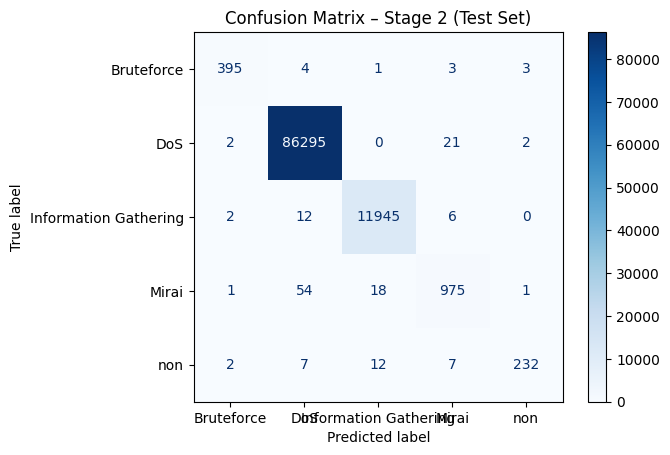

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=label_encoder.classes_
)

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Stage 2 (Test Set)")
plt.show()


In [4]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix (rows = true labels, columns = predicted labels):")
print(cm)


Confusion Matrix (rows = true labels, columns = predicted labels):
[[  395     4     1     3     3]
 [    2 86295     0    21     2]
 [    2    12 11945     6     0]
 [    1    54    18   975     1]
 [    2     7    12     7   232]]
